# Random Forest Project

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:

1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data 

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

<AxesSubplot:>

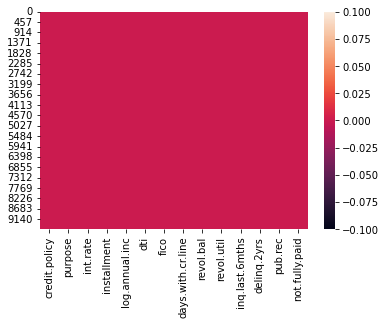

In [4]:
sns.heatmap(df.isnull())

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

In [6]:
df.fico

0       737
1       707
2       682
3       712
4       667
       ... 
9573    672
9574    722
9575    687
9576    692
9577    732
Name: fico, Length: 9578, dtype: int64

In [8]:
df['credit.policy']

0       1
1       1
2       1
3       1
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: credit.policy, Length: 9578, dtype: int64

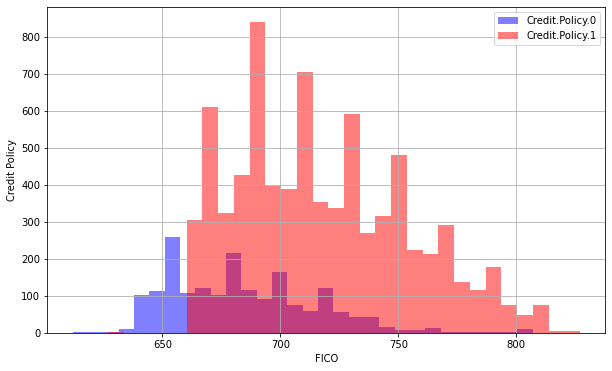

In [20]:
plt.figure(figsize=(10, 6))
df[df['credit.policy'] == 0]['fico'].hist(bins=30, alpha=0.5, color='blue', label='Credit.Policy.0')
df[df['credit.policy'] == 1]['fico'].hist(bins=30, alpha=0.5, color='red', label='Credit.Policy.1')
plt.ylabel('Credit Policy')
plt.xlabel('FICO')
plt.legend()
plt.show()

** Create a similar figure, except this time select by the not.fully.paid column.**

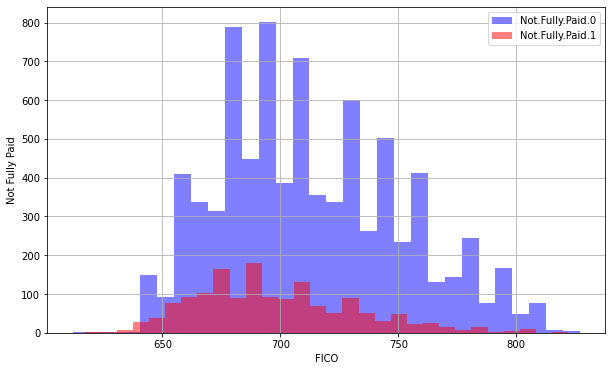

In [21]:
plt.figure(figsize=(10, 6))
df[df['not.fully.paid'] == 0]['fico'].hist(bins=30, alpha=0.5, color='blue', label='Not.Fully.Paid.0')
df[df['not.fully.paid'] == 1]['fico'].hist(bins=30, alpha=0.5, color='red', label='Not.Fully.Paid.1')
plt.ylabel('Not Fully Paid')
plt.xlabel('FICO')
plt.legend()
plt.show()

In [23]:
df.corrwith(df['credit.policy']).sort_values()

inq.last.6mths      -0.535511
int.rate            -0.294089
revol.bal           -0.187518
not.fully.paid      -0.158119
revol.util          -0.104095
dti                 -0.090901
delinq.2yrs         -0.076318
pub.rec             -0.054243
log.annual.inc       0.034906
installment          0.058770
days.with.cr.line    0.099026
fico                 0.348319
credit.policy        1.000000
dtype: float64

<AxesSubplot:>

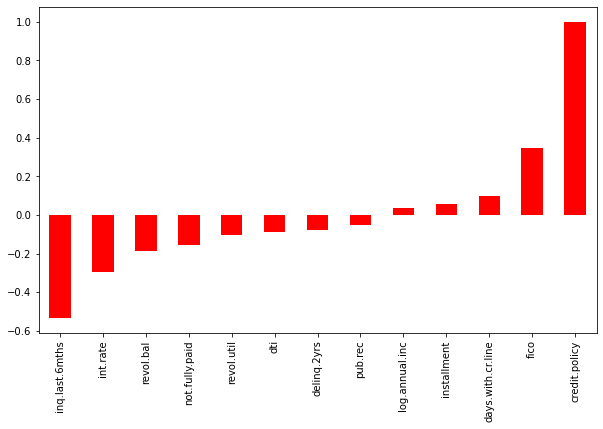

In [26]:
plt.figure(figsize=(10, 6))
df.corrwith(df['credit.policy']).sort_values().plot(kind='bar', color='red')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

In [27]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<AxesSubplot:xlabel='purpose', ylabel='count'>

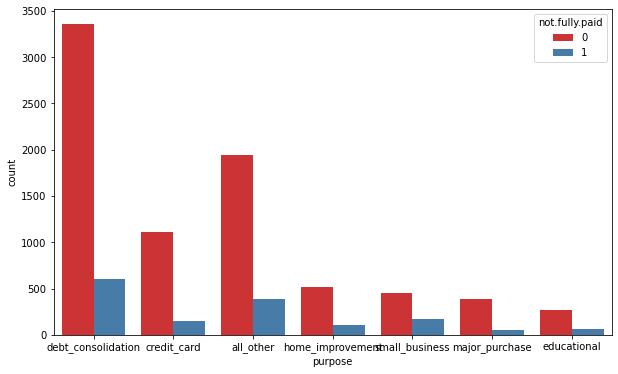

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

<Figure size 720x432 with 0 Axes>

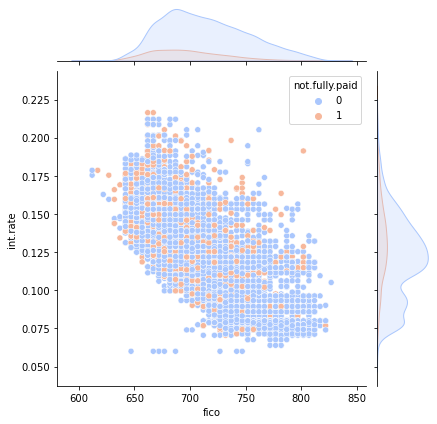

In [32]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='fico', y='int.rate', data=df, hue='not.fully.paid', palette='coolwarm')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 720x432 with 0 Axes>

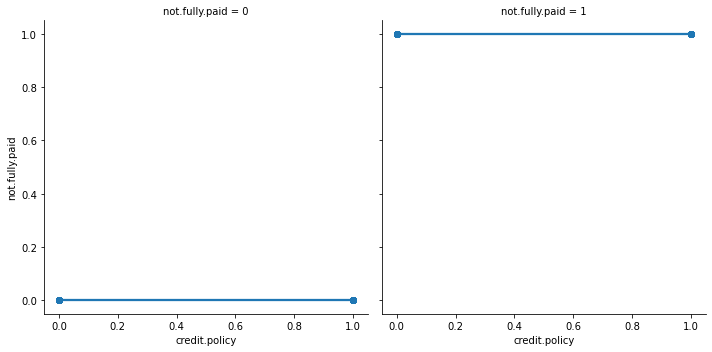

In [40]:
plt.figure(figsize=(10, 6))
sns.lmplot( x='credit.policy', col='not.fully.paid', y='not.fully.paid', data=df)

<Figure size 720x432 with 0 Axes>

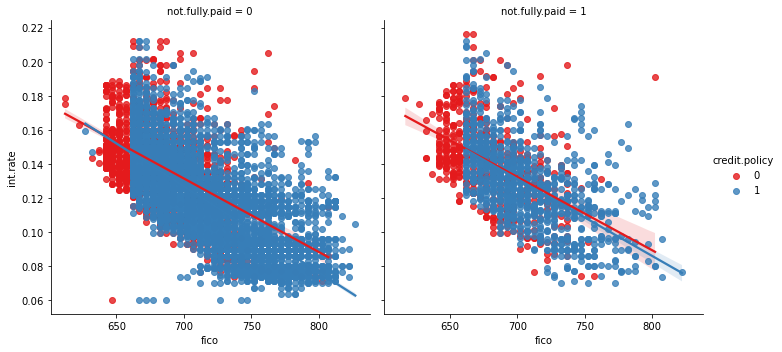

In [42]:
plt.figure(figsize=(10, 6))
sns.lmplot(y='int.rate',
           x='fico',
           data=df,hue='credit.policy',
           col='not.fully.paid',
           palette='Set1')

# Builing Decision Tree model here

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [44]:
final_data = pd.get_dummies(df['purpose'], columns=df['purpose'], drop_first=True)

In [45]:
final_data

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [46]:
df = pd.concat((df, final_data), axis=1)

In [47]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [48]:
df.drop('purpose', axis=1, inplace=True)

In [49]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [50]:
X = df.drop('not.fully.paid', axis=1)
y=df['not.fully.paid']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
decision_tree = DecisionTreeClassifier()

In [53]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = decision_tree.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.74      0.75      2874



In [57]:
print(confusion_matrix(y_test, y_pred))

[[2009  422]
 [ 337  106]]


# Builing Random Forest model here

In [58]:
random_forest = RandomForestClassifier()

In [59]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = random_forest.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [62]:
print(confusion_matrix(y_test, y_pred))

[[2421   10]
 [ 433   10]]


# What performed better the random forest or the decision tree?

1. Depends what metric you are trying to optimize for. 
2. Notice the recall for each class for the models.
3. Neither did very well, more feature engineering is needed.


# Great Job!